# Introduction to Predictive Analytics

In today's age of big data, insurance pricing models are becoming more dynamic. With better systems, companies are able to capture more comprehensive information about policyholders, leading to more rating factors becoming available. Regulators have also taken note of this and now require more data-driven rates. Given all this, traditional actuarial ratemaking methods may be due for an overhaul.

In this workshop, we present the **Generalized Linear Model (GLM)** - a one-stop solution to generating highly interpretable and data-driven rating models. We will introduce how to build, diagnose and interpret your own GLMs in the R programming language by demonstrating a use case on sample motor insurance data.  The R statistical computing environment is one of the most comprehensive and widely used statistical modelling tools.

 ## 1. Understanding R

Like most programming languages, R works through functions. These functions are stored within different libraries or **packages**. Hence, we need to load the required packages before we start to use R. In this tutorial we will use the following packages, all loaded using the `library` R command.

In [1]:
library(MASS) #Used for Efficient Statistical Computing
library(ggplot2) #Used for Easy Data Visualization
library(readr) #Used for Faster Data Inputs and Outputs
library(dplyr) #Used for Easy Data Wrangling
library(statmod) #Used for Model Diagnostics

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Great, we have loaded all required packages. 

If you are a first-time R user, chances are that not all the above packages will be available to you at first. Hence, we may need to install certain packages into our environment. This is easy to do - just use the `install.packages("package_name")` R command. For example, to install the `MASS` package, use `install.packages("MASS")`.

## 2. Loading and Inspecting the Data

First, we load the data into our environment. There are 2 datasets - *train* and *test*. The *train* dataset is used to fit the model, while the *test* dataset is used to evaluate its performance.

In [2]:
train <- read_csv("~/Desktop/GAS PA Workshop/train.csv")
test <- read_csv("~/Desktop/GAS PA Workshop/test.csv")

Parsed with column specification:
cols(
  ClaimNb = col_double(),
  Exposure = col_double(),
  Area = col_character(),
  VehPower = col_double(),
  BonusMalus = col_double(),
  VehBrand = col_character(),
  VehGas = col_character(),
  Region = col_character(),
  ClaimAmount = col_double(),
  DrivAgeBand = col_character(),
  DensityBand = col_character(),
  VehAgeBand = col_character(),
  Freq = col_double(),
  severity = col_double()
)
Parsed with column specification:
cols(
  ClaimNb = col_double(),
  Exposure = col_double(),
  Area = col_character(),
  VehPower = col_double(),
  BonusMalus = col_double(),
  VehBrand = col_character(),
  VehGas = col_character(),
  Region = col_character(),
  ClaimAmount = col_double(),
  DrivAgeBand = col_character(),
  DensityBand = col_character(),
  VehAgeBand = col_character(),
  Freq = col_double(),
  severity = col_double()
)


We will now look at a high-level summary of the *train* data.

In [4]:
summary(train) #Summary Statistics of All Variables

    ClaimNb            Exposure            Area              VehPower     
 Min.   : 0.00000   Min.   :0.002732   Length:509635      Min.   : 4.000  
 1st Qu.: 0.00000   1st Qu.:0.180000   Class :character   1st Qu.: 5.000  
 Median : 0.00000   Median :0.490000   Mode  :character   Median : 6.000  
 Mean   : 0.05863   Mean   :0.528906                      Mean   : 6.452  
 3rd Qu.: 0.00000   3rd Qu.:0.990000                      3rd Qu.: 7.000  
 Max.   :16.00000   Max.   :2.010000                      Max.   :15.000  
                                                                          
   BonusMalus       VehBrand            VehGas             Region         
 Min.   : 50.00   Length:509635      Length:509635      Length:509635     
 1st Qu.: 50.00   Class :character   Class :character   Class :character  
 Median : 50.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 59.79                                                           
 3rd Qu.: 65.00          

Next, we look at a structural summary of the *train* data. This tells us what type of variable each column in the data is.

In [5]:
str(train) #Check Variable Types

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	509635 obs. of  14 variables:
 $ ClaimNb    : num  1 1 1 1 0 0 0 0 0 0 ...
 $ Exposure   : num  0.1 0.09 0.87 0.72 0.04 0.67 0.03 0.96 1 0.03 ...
 $ Area       : chr  "D" "B" "C" "C" ...
 $ VehPower   : num  5 7 5 9 6 7 7 7 4 6 ...
 $ BonusMalus : num  50 50 50 50 50 50 50 50 50 50 ...
 $ VehBrand   : chr  "B12" "B12" "B12" "B12" ...
 $ VehGas     : chr  "Regular" "Diesel" "Regular" "Regular" ...
 $ Region     : chr  "R82" "R72" "R31" "R82" ...
 $ ClaimAmount: num  0 0 0 0 0 0 0 0 0 0 ...
 $ DrivAgeBand: chr  "(45,55]" "(45,55]" "(65,Inf]" "(55,65]" ...
 $ DensityBand: chr  "(100,200]" "(1e+03,2e+03]" "(200,400]" "(400,1e+03]" ...
 $ VehAgeBand : chr  "0" "0" "0" "0" ...
 $ Freq       : num  10 11.11 1.15 1.39 0 ...
 $ severity   : num  0 0 0 0 NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   ClaimNb = col_double(),
  ..   Exposure = col_double(),
  ..   Area = col_character(),
  ..   VehPower = col_double(),
  ..   Bo

We also quickly look at the variable names in the *train* data. While the above 2 outputs already give us this, it might help sometimes to see them in a more readable manner.

In [6]:
colnames(train) #Variable Names

[1] "ClaimNb"     "Exposure"    "Area"        "VehPower"    "BonusMalus" 
 [6] "VehBrand"    "VehGas"      "Region"      "ClaimAmount" "DrivAgeBand"
[11] "DensityBand" "VehAgeBand"  "Freq"        "severity"

## 3. Exploratory Data Analysis (EDA)

EDA is extremely important. It helps give a more clear picture of the data. 

Since we are fitting GLMs - models that are bound by a rigorous set of distributional assumptions - it would be useful to get an idea of how Claim Amounts and Claim Counts are distributed. In the EDA process, we therefore focus on this.

We start with...

#### 3.1 Histogram of Claim Amounts

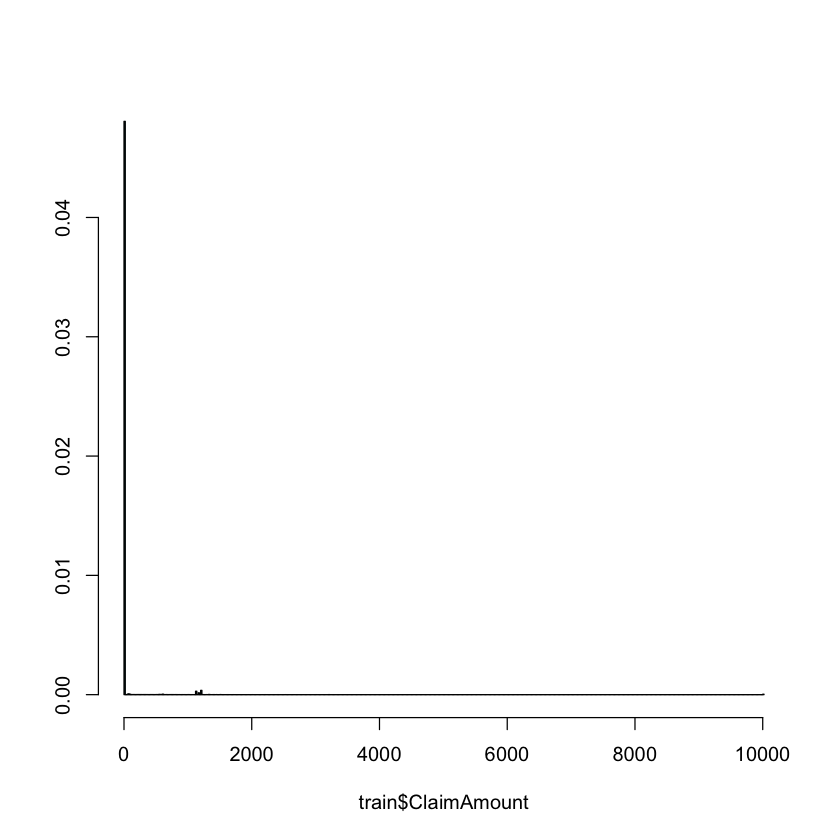

In [7]:
truehist(train$ClaimAmount)

As expected, most policyholders have not made a claim. We do see some non-zero claims, however the above graph doesn't tell us much about them, so we'll need to look at these differently. 

#### 3.2 Histogram of Log of Claim Amounts

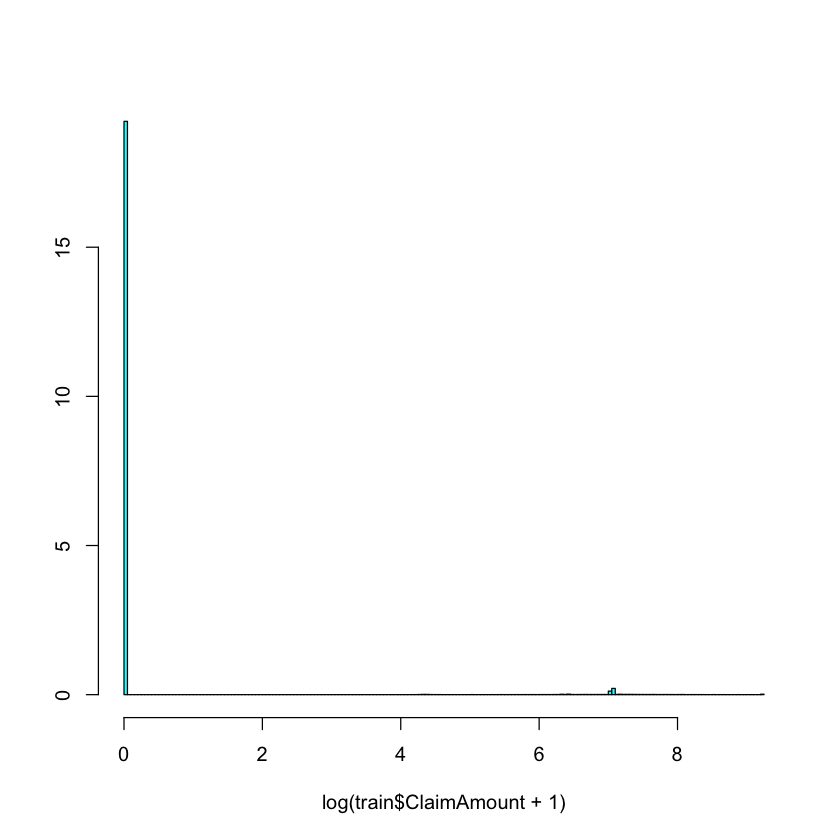

In [8]:
truehist(log(train$ClaimAmount + 1)) #We add 1 to the ClaimAmount variable because log(0) doesn't exist.

Pretty similar picture as the previous graph. Let's look at only the non-zero claims now.

#### 3.3 Histogram of Non-Zero Claim Amounts

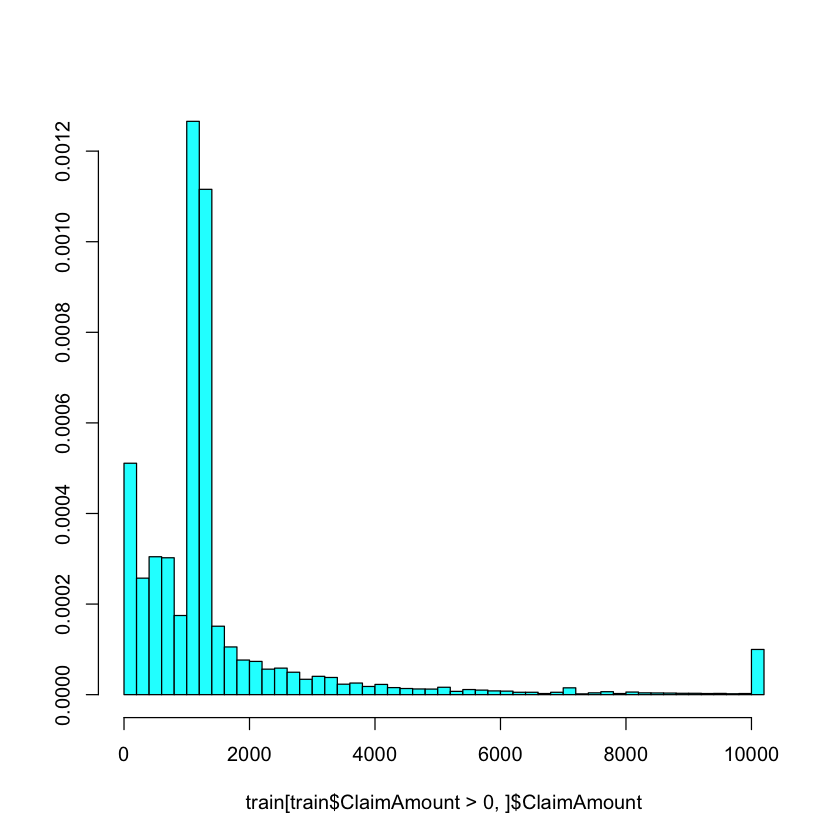

In [9]:
truehist(train[train$ClaimAmount > 0, ]$ClaimAmount)

This gives us a better idea of claims. 

Moving on to Claim Counts.

#### 3.4 Bar Chart of Claim Counts

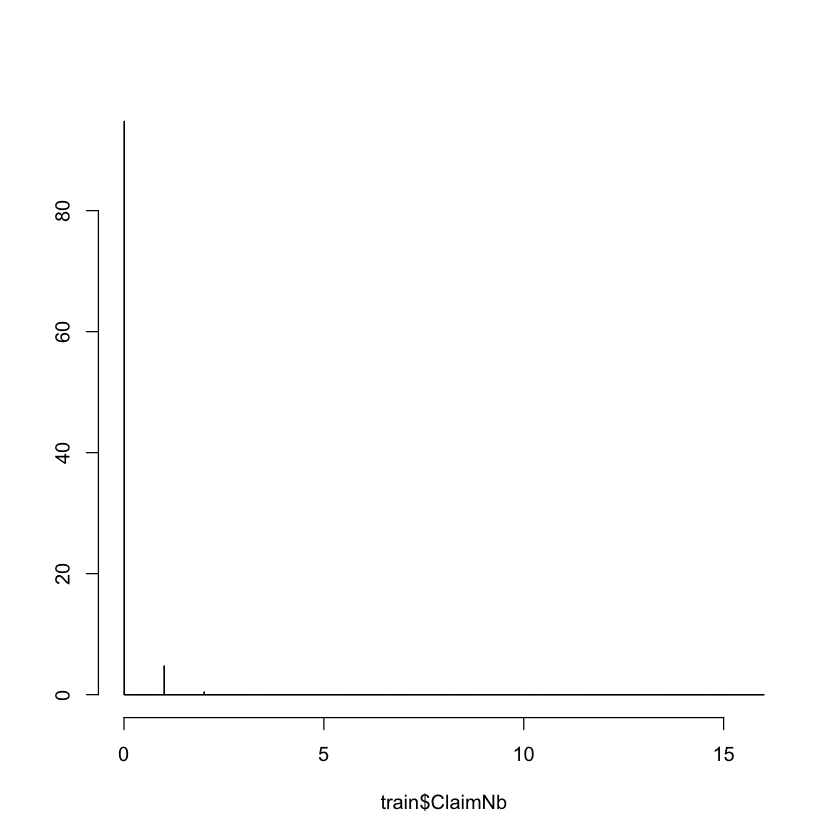

In [10]:
truehist(train$ClaimNb)

Again, as expected, most policyholders didn't file any claims, with some filing 1 and 2 claims.

Great, now that we've got some idea of distributions, we can start creating some models! We look at the 2 components of aggregate claims - **Frequency** (number of claims per exposure) and **Severity** (average cost per claim). Both components are modelled separately.

We start with **Frequency**.

## 4. Frequency Modelling

Since Frequency deals with the number of claims, we need a distribution that is suited for counts. The **Poisson** distribution is an ideal candidate.

Let's start with a simple model with just 2 rating factors - Driver Age Band and Vehicle Age Band. We will use the Poisson distribution with a **logarithmic link**.

In [11]:
glm_freq1 <- glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand, data = train, family = poisson(link = "log"))
summary(glm_freq1)


Call:
glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand, family = poisson(link = "log"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5600  -0.3618  -0.3281  -0.3016  11.6313  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.85263    0.13586 -13.636  < 2e-16 ***
DrivAgeBand(18,25]  -0.20275    0.13643  -1.486  0.13725    
DrivAgeBand(25,35]  -0.71655    0.13557  -5.285 1.25e-07 ***
DrivAgeBand(35,45]  -0.64306    0.13545  -4.748 2.06e-06 ***
DrivAgeBand(45,55]  -0.43957    0.13538  -3.247  0.00117 ** 
DrivAgeBand(55,65]  -0.58902    0.13590  -4.334 1.46e-05 ***
DrivAgeBand(65,Inf] -0.38214    0.13600  -2.810  0.00496 ** 
VehAgeBand1         -0.68879    0.02565 -26.850  < 2e-16 ***
VehAgeBand10        -0.44513    0.02909 -15.302  < 2e-16 ***
VehAgeBand11        -0.43200    0.03178 -13.592  < 2e-16 ***
VehAgeBand12        -0.15752    0.02896  -5.439 5.35e-08 ***
VehAgeBand13        -0.43438   

Let's see if this model conforms to the assumptions of a GLM. These are:

1. The residuals must be normally distributed.
2. The residuals must have constant variance and be centered around 0
3. The residuals must be random, i.e., there should be no discernable pattern to them.

To check for these assumptions, we look at the **Residual Q-Q Plot** and a **Residuals vs. Fitted Values Plot**.

In [12]:
#Generate Model Residuals
resid <- qresiduals(glm_freq1)
resid <- ifelse(is.na(resid) | is.infinite(resid), residuals(glm_freq1), resid)

Warning message in runif(n = length(y), min = a, max = b):
“NAs produced”

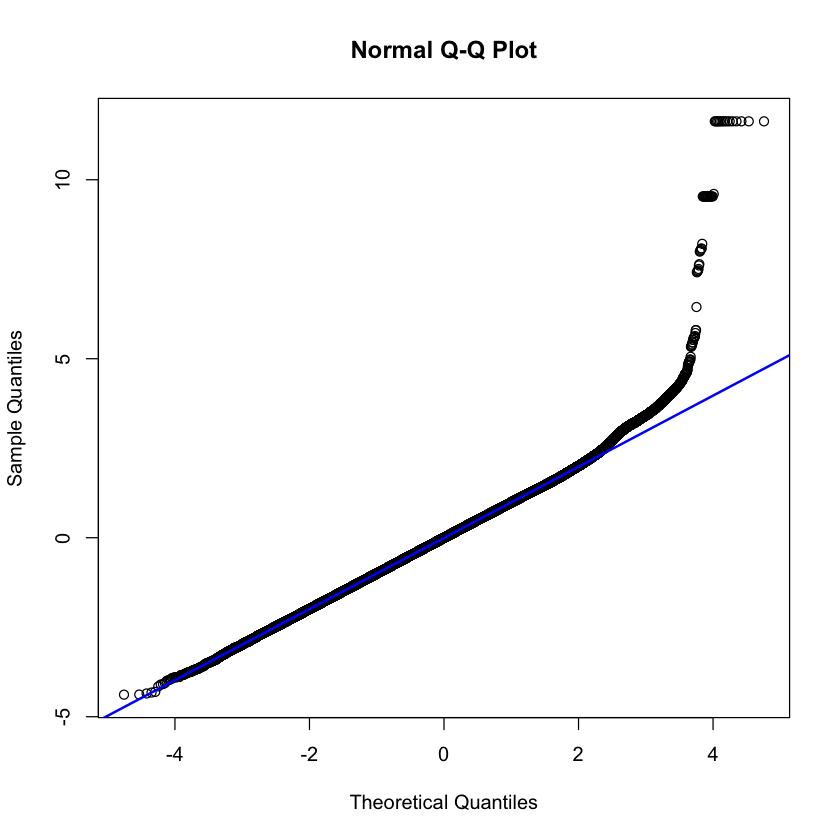

In [13]:
#Residual Q-Q Plot
qqnorm(resid)
qqline(resid, col="blue",lwd=2)

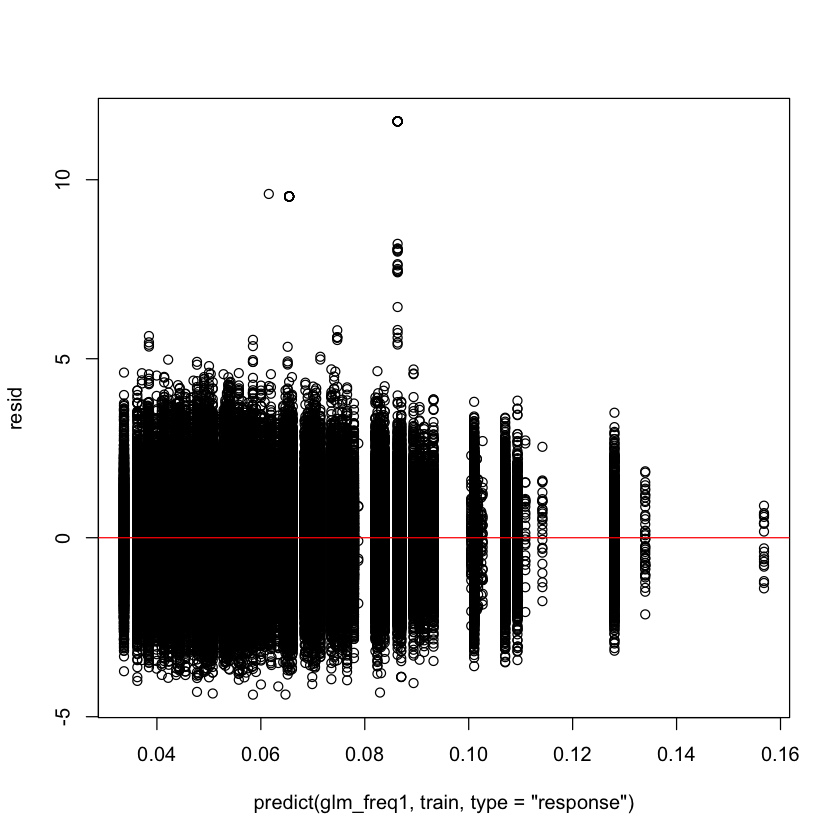

In [14]:
#Plot of Residuals vs. Fitted Values
plot(predict(glm_freq1, train, type = "response"), resid)
abline(h = 0, col = "red")

There is a clear right tail in the residuals, as seen in the Q-Q plot. This suggests that perhaps we have some outliers in the data. The plot of residuals vs. fitted values seems to show that the model conforms to Assumptions 2 and 3. Overall, this seems to be a decent model.

However, Frequency isn't just the number of claims. It is the number of claims *per exposure*. Hence, we need to include the effect of exposure into this model. 

However, we do not necessarily want to model it. Since exposure is known, we do not need the GLM to estimate a parameter/coefficient for it. We need our model to estimate coefficients for all the rating factors, but then tack the effect of exposure on top of this. Luckily, GLMs allow for this through the **offset** parameter.

In [15]:
glm_freq2 <- glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand, data = train, family = poisson(link = "log"), 
                 offset = log(Exposure))
summary(glm_freq2)


Call:
glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand, family = poisson(link = "log"), 
    data = train, offset = log(Exposure))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0656  -0.4214  -0.3073  -0.1718  12.4730  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.08636    0.13586   0.636    0.525    
DrivAgeBand(18,25]  -0.65245    0.13644  -4.782 1.74e-06 ***
DrivAgeBand(25,35]  -1.27878    0.13558  -9.432  < 2e-16 ***
DrivAgeBand(35,45]  -1.30710    0.13545  -9.650  < 2e-16 ***
DrivAgeBand(45,55]  -1.17545    0.13538  -8.682  < 2e-16 ***
DrivAgeBand(55,65]  -1.37024    0.13590 -10.083  < 2e-16 ***
DrivAgeBand(65,Inf] -1.29433    0.13599  -9.518  < 2e-16 ***
VehAgeBand1         -1.15225    0.02565 -44.918  < 2e-16 ***
VehAgeBand10        -1.10094    0.02906 -37.887  < 2e-16 ***
VehAgeBand11        -1.17004    0.03177 -36.834  < 2e-16 ***
VehAgeBand12        -0.88854    0.02894 -30.702  < 2e-16 ***
VehAgeB

We look at the residual diagnostics of this model.

In [16]:
#Generate Model Residuals
resid <- qresiduals(glm_freq2)
resid <- ifelse(is.na(resid) | is.infinite(resid), residuals(glm_freq1), resid)

Warning message in runif(n = length(y), min = a, max = b):
“NAs produced”

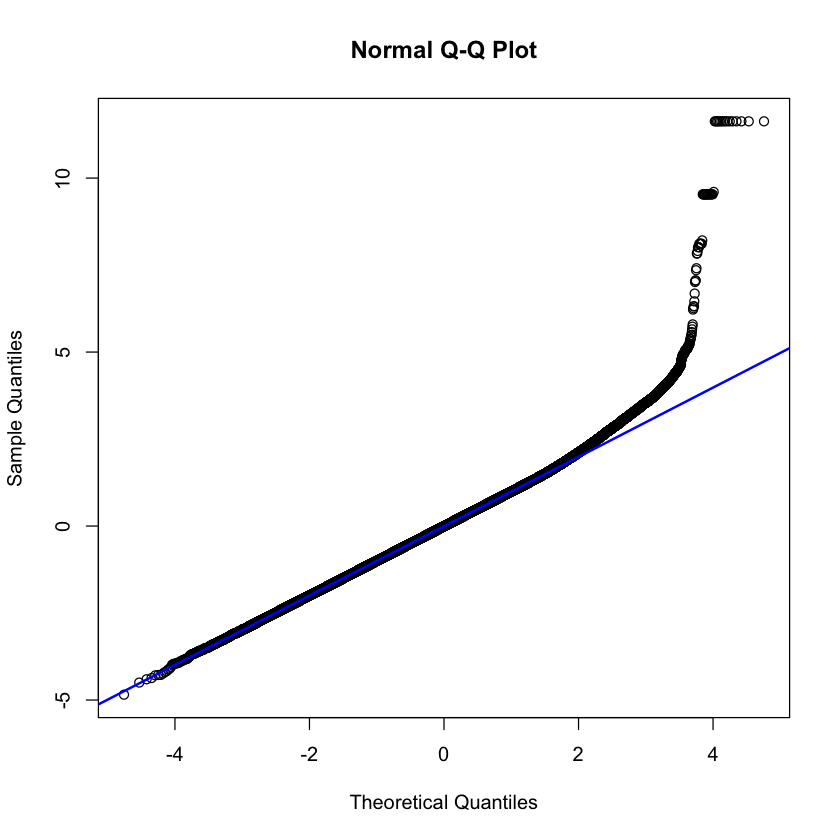

In [17]:
#Residual Q-Q Plot
qqnorm(resid)
qqline(resid, col="blue",lwd=2)

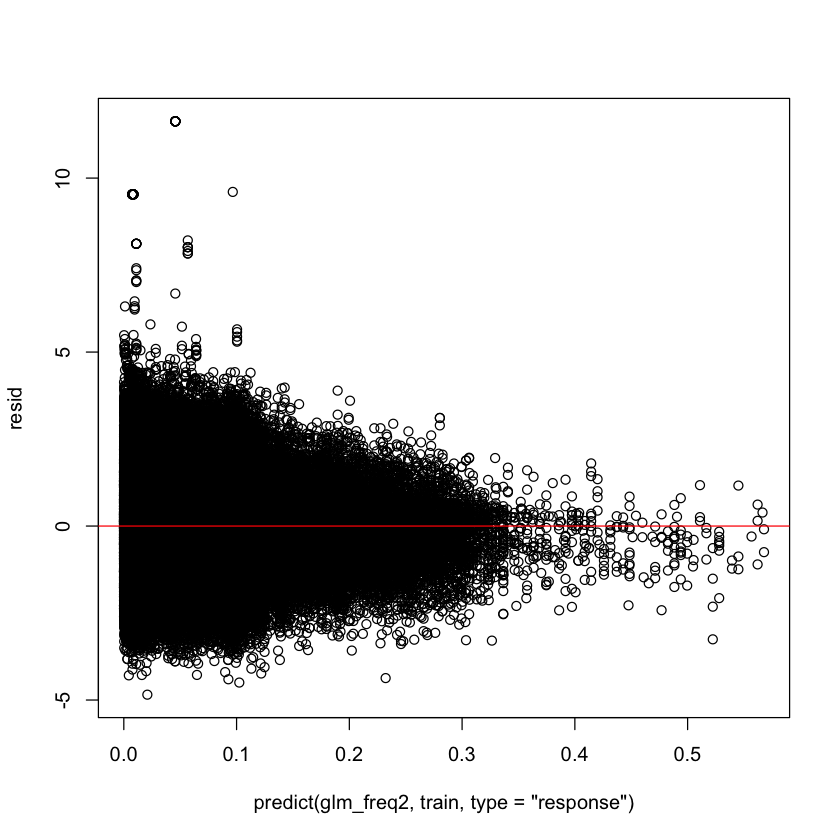

In [18]:
#Plot of Residuals vs. Fitted Values
plot(predict(glm_freq2, train, type = "response"), resid)
abline(h = 0, col = "red")

Now we get the true picture. We have seen that there is a heavy right tail in the data. The plot of residuals vs. fitted values now shows that the true model actually does not satisfy the constant variance assumption. Hence, we need to improve it. 

In a bid to do so, we add a third rating factor to our model - Vehicle Brand.

In [19]:
glm_freq3 <- glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand + VehBrand, data = train, family = poisson(link = "log"), 
                 offset = log(Exposure))
summary(glm_freq3)


Call:
glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand + VehBrand, 
    family = poisson(link = "log"), data = train, offset = log(Exposure))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0895  -0.4183  -0.3089  -0.1722  12.4204  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.03192    0.13652   0.234  0.81515    
DrivAgeBand(18,25]  -0.65661    0.13644  -4.812 1.49e-06 ***
DrivAgeBand(25,35]  -1.28825    0.13559  -9.501  < 2e-16 ***
DrivAgeBand(35,45]  -1.32221    0.13547  -9.760  < 2e-16 ***
DrivAgeBand(45,55]  -1.18782    0.13540  -8.773  < 2e-16 ***
DrivAgeBand(55,65]  -1.38600    0.13592 -10.197  < 2e-16 ***
DrivAgeBand(65,Inf] -1.30021    0.13602  -9.559  < 2e-16 ***
VehAgeBand1         -1.14273    0.02567 -44.523  < 2e-16 ***
VehAgeBand10        -1.00591    0.03028 -33.222  < 2e-16 ***
VehAgeBand11        -1.06342    0.03314 -32.086  < 2e-16 ***
VehAgeBand12        -0.78074    0.03046 -25.633  < 2e-16 

Vehicle Brand doesn't look as promising as Vehicle Age Band and Driver Age Band. This is because not all levels of Vehicle Brand are *statistically significant*. This means that, for some levels (eg. VehBrandB5 and VehBrand B13), there is a high likelihood our model came up with the coefficient it estimated purely by chance. However since this appears to be the case for only a few levels, we can still accept this rating factor.

We look at the residual diagnostics of this model.

In [20]:
#Generate Model Residuals
resid <- qresiduals(glm_freq3)
resid <- ifelse(is.na(resid) | is.infinite(resid), residuals(glm_freq1), resid)

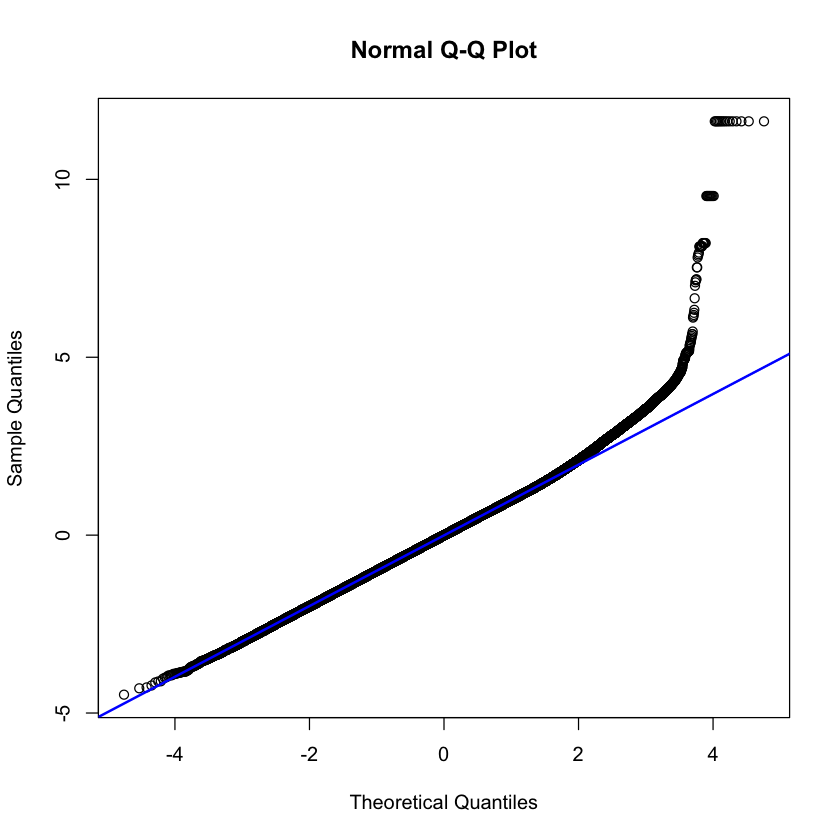

In [21]:
#Residual Q-Q Plot
qqnorm(resid)
qqline(resid, col="blue",lwd=2)

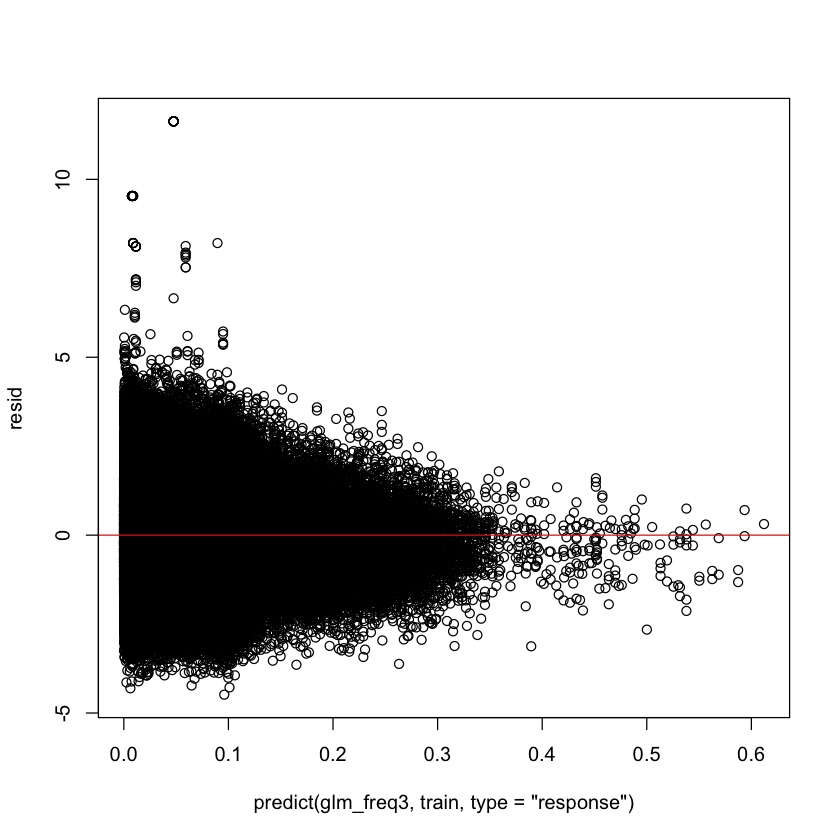

In [22]:
#Plot of Residuals vs. Fitted Values
plot(predict(glm_freq3, train, type = "response"), resid)
abline(h = 0, col = "red")

From the residual diagnostics, it doesn't look like this model was much of an improvement. Perhaps adding some more complexity might help.

We now look at a model where an interaction effect between Driver Age Band and Vehicle Brand is added.

In [23]:
glm_freq4 <- glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand + VehBrand + DrivAgeBand:VehBrand, data = train, family = poisson(link = "log"), 
                 offset = log(Exposure))
summary(glm_freq4)


Call:
glm(formula = ClaimNb ~ DrivAgeBand + VehAgeBand + VehBrand + 
    DrivAgeBand:VehBrand, family = poisson(link = "log"), data = train, 
    offset = log(Exposure))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1119  -0.4148  -0.3074  -0.1715  12.2129  

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.43736    0.30216  -1.447 0.147779    
DrivAgeBand(18,25]              -0.18332    0.30434  -0.602 0.546944    
DrivAgeBand(25,35]              -0.95677    0.30295  -3.158 0.001588 ** 
DrivAgeBand(35,45]              -0.91938    0.30257  -3.039 0.002377 ** 
DrivAgeBand(45,55]              -0.55714    0.30224  -1.843 0.065274 .  
DrivAgeBand(55,65]              -0.93540    0.30339  -3.083 0.002048 ** 
DrivAgeBand(65,Inf]             -0.87687    0.30342  -2.890 0.003853 ** 
VehAgeBand1                     -1.14304    0.02567 -44.527  < 2e-16 ***
Ve

This is interesting. Notice that for the interaction between DrivAgeBand(65,Inf] and VehBrand B14 the model returned an `NA` coefficient. This means that this combination is perfectly correlated in our data. Hence, the effect of this combination is already contained in the individual variables itself and having this particular interaction does not add any information to the model, thereby making it redundant. This is not true for other combinations of Driver Age Band and Vehicle Brand. 

Let's look at the residual diagnostics of this model.

In [24]:
#Generate Model Residuals
resid <- qresiduals(glm_freq4)
resid <- ifelse(is.na(resid) | is.infinite(resid), residuals(glm_freq1), resid)

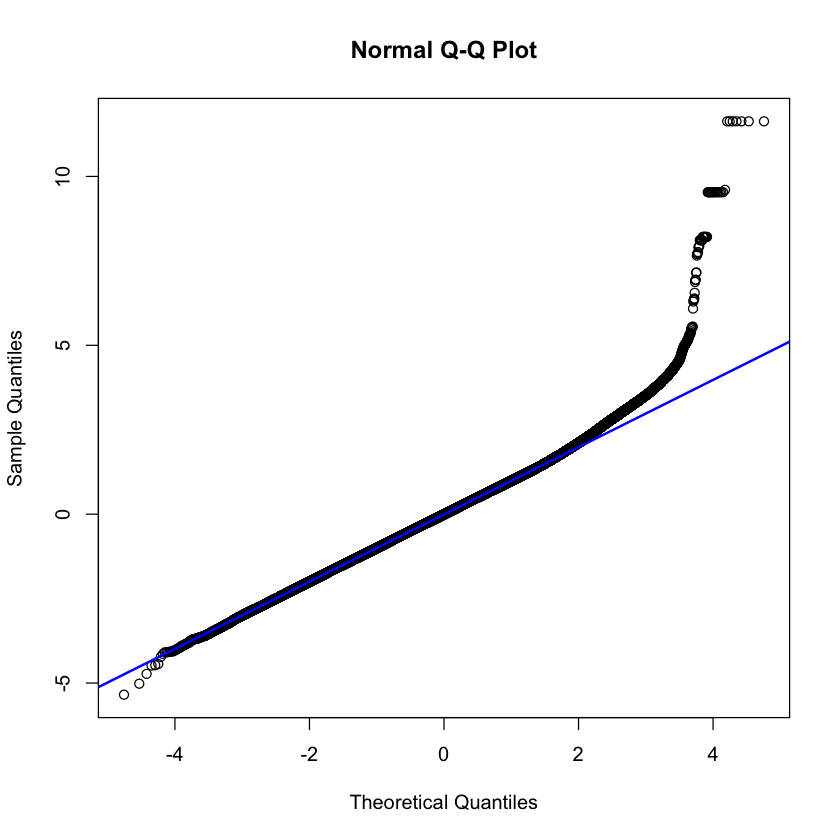

In [25]:
#Residual Q-Q Plot
qqnorm(resid)
qqline(resid, col="blue",lwd=2)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

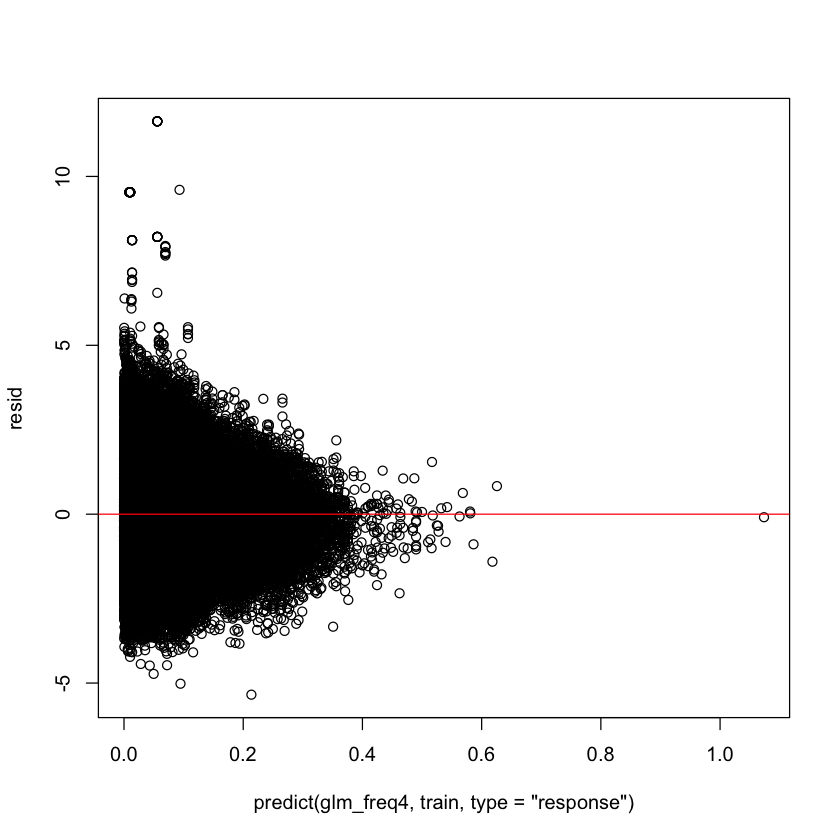

In [26]:
#Plot of Residuals vs. Fitted Values
plot(predict(glm_freq4, train, type = "response"), resid)
abline(h = 0, col = "red")

The above plots tell a similar story for this model as the previous 2 models. Further, we observed a redundancy in our interaction term. Hence, adding this layer of complexity does not seem to help our model all that much.

All the diagnostics we have looked at does not tell us one important thing - **how will do the models fare against data that they have not seen before?** The true test of a predictive model lies in how well it can generalize the patterns it has learnt on the data. The only way to evaluate this is to predict the model on completely unseen data and compare it to the actuals. 

Notice that in the beginning, we imported 2 datasets - *train* and *test*. From the PoV of our models, the *train* dataset is data that the model has fitted on. The *test* dataset is data the model has never seen before. Hence now we predict each of our models on the *test* data and compare these predictions to the actual claim counts.

In [27]:
test$ClaimNb_Predict1 <- predict(glm_freq1, test, type = "response") #Model 1
test$ClaimNb_Predict2 <- predict(glm_freq2, test, type = "response") #Model 2
test$ClaimNb_Predict3 <- predict(glm_freq3, test, type = "response") #Model 3
test$ClaimNb_Predict4 <- predict(glm_freq4, test, type = "response") #Model 4

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

In [28]:
#Comparing Predicted Claim Counts to Actual Claim Counts
summary(test$ClaimNb)
summary(test$ClaimNb_Predict1)
summary(test$ClaimNb_Predict2)
summary(test$ClaimNb_Predict3)
summary(test$ClaimNb_Predict4)

sum(test$ClaimNb)
sum(test$ClaimNb_Predict1)
sum(test$ClaimNb_Predict2)
sum(test$ClaimNb_Predict3)
sum(test$ClaimNb_Predict4)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.00000  0.00000  0.05834  0.00000 16.00000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03367 0.04771 0.05416 0.05857 0.06599 0.15682 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001643 0.0200137 0.0521814 0.0585278 0.0921061 0.5996105 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001424 0.0202698 0.0531054 0.0585298 0.0895336 0.5626120 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000031 0.0200724 0.0526208 0.0585341 0.0885920 0.9955804 

[1] 9910

[1] 9949.35

[1] 9942.58

[1] 9942.922

[1] 9943.658

Comparing the means, we observe that Model 1 overshot compared to the true mean the most. Comparing the totals, we see that Model 2 was the closest to the true total. 

## 5. Severity Modelling